In [ ]:
## Notebook env: farnaz_spatial (farnaz_spatial kernel)
## this notebook quantifies and compares the frequency of each cell type across different regions and temperatures

## in this notebook may need to add synthetic values for the spots and then remove them after centers and hexagons obtained

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
## load in the data

results_folder = '/home/ssobti/projects/farnaz_spatial/output_data'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/mouse/cell2location/multi_ref_annot/reference_signatures'
run_name = f'{results_folder}/mouse_late_2023/cell2location/multi_ref_annot/cell2location_map/N2_alpha20_cleaned_slides_v2'

adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)

In [3]:
adata_vis.obs

in_tissue  array_row  array_col  sample  \
spot_id                                                              
B006_3_AACAATCCGAGTGGAC-1          1        103         47  B006_3   
B006_3_AACAATGGAACCACAT-1          1         54         32  B006_3   
B006_3_AACAATGTGCTCCGAG-1          1         98        158  B006_3   
B006_3_AACACCAGCCTACTCG-1          1         31         39  B006_3   
B006_3_AACACCGAGCTTGGAT-1          1         56         24  B006_3   
...                              ...        ...        ...     ...   
B021_6_TGTTGGTGAGCGGACG-1          1         59         17  B021_6   
B021_6_TGTTGGTGCGCACGAG-1          1         24        108  B021_6   
B021_6_TGTTGGTGCGCTTCGC-1          1         37        127  B021_6   
B021_6_TGTTGGTGCGGAATCA-1          1         83         87  B021_6   
B021_6_TGTTGGTGGACTCAGG-1          1         86        106  B021_6   

                           n_genes_by_counts  log1p_n_genes_by_counts  \
spot_id                                                                 
B006_3_AACAATCCGAGTGGAC-1                253                 5.537334   
B006_3_AACAATGGAACCACAT-1                822                 6.712956   
B006_3_AACAATGTGCTCCGAG-1               1283                 7.157735   
B006_3_AACACCAGCCTACTCG-1                872                 6.771936   
B006_3_AACACCGAGCTTGGAT-1                565                 6.338594   
...                                      ...                      ...   
B021_6_TGTTGGTGAGCGGACG-1                986                 6.894670   
B021_6_TGTTGGTGCGCACGAG-1                646                 6.472346   
B021_6_TGTTGGTGCGCTTCGC-1                859                 6.756932   
B021_6_TGTTGGTGCGGAATCA-1               2619                 7.870930   
B021_6_TGTTGGTGGACTCAGG-1               1376                 7.227662   

                           total_counts  log1p_total_counts  \
spot_id                                                       
B006_3_AACAATCCGAGTGGAC-1         281.0            5.641907   
B006_3_AACAATGGAACCACAT-1        1059.0            6.966024   
B006_3_AACAATGTGCTCCGAG-1        1897.0            7.548556   
B006_3_AACACCAGCCTACTCG-1        1134.0            7.034388   
B006_3_AACACCGAGCTTGGAT-1         655.0            6.486161   
...                                 ...                 ...   
B021_6_TGTTGGTGAGCGGACG-1        1143.0            7.042286   
B021_6_TGTTGGTGCGCACGAG-1         817.0            6.706862   
B021_6_TGTTGGTGCGCTTCGC-1        1184.0            7.077498   
B021_6_TGTTGGTGCGGAATCA-1        5331.0            8.581482   
B021_6_TGTTGGTGGACTCAGG-1        1801.0            7.496653   

                           pct_counts_in_top_50_genes  \
spot_id                                                 
B006_3_AACAATCCGAGTGGAC-1                   27.758007   
B006_3_AACAATGGAACCACAT-1                   23.040604   
B006_3_AACAATGTGCTCCGAG-1                   21.349499   
B006_3_AACACCAGCCTACTCG-1                   21.516755   
B006_3_AACACCGAGCTTGGAT-1                   21.374046   
...                                               ...   
B021_6_TGTTGGTGAGCGGACG-1                   15.223097   
B021_6_TGTTGGTGCGCACGAG-1                   23.745410   
B021_6_TGTTGGTGCGCTTCGC-1                   25.168919   
B021_6_TGTTGGTGCGGAATCA-1                   25.848809   
B021_6_TGTTGGTGGACTCAGG-1                   17.767907   

                           pct_counts_in_top_100_genes  \
spot_id                                                  
B006_3_AACAATCCGAGTGGAC-1                    45.551601   
B006_3_AACAATGGAACCACAT-1                    31.822474   
B006_3_AACAATGTGCTCCGAG-1                    29.362151   
B006_3_AACACCAGCCTACTCG-1                    30.335097   
B006_3_AACACCGAGCTTGGAT-1                    29.007634   
...                                                ...   
B021_6_TGTTGGTGAGCGGACG-1                    22.484689   
B021_6_TGTTGGTGCGCACGAG-1                    33.170135   
B021_6_TGTTGGTGCGCTTCGC-

In [4]:
spot_exp = adata_vis.obsm['q05_cell_abundance_w_sf'].assign(array_row = adata_vis.obs['array_row'], array_col = adata_vis.obs['array_col'], sample = adata_vis.obs['sample'])
spot_exp = spot_exp[np.concatenate([spot_exp.columns[-3:], spot_exp.columns[:-3]])]

spot_exp_dict = {}
for slide in spot_exp['sample'].unique():
    spot_exp_dict[slide] = spot_exp.loc[spot_exp['sample'] == slide, :]


In [6]:
spot_exp_dict['B006_3']

array_row  array_col  sample  \
spot_id                                                   
B006_3_AACAATCCGAGTGGAC-1        103         47  B006_3   
B006_3_AACAATGGAACCACAT-1         54         32  B006_3   
B006_3_AACAATGTGCTCCGAG-1         98        158  B006_3   
B006_3_AACACCAGCCTACTCG-1         31         39  B006_3   
B006_3_AACACCGAGCTTGGAT-1         56         24  B006_3   
...                              ...        ...     ...   
B006_3_TGTTGGCCTGTAGCGG-1         40         78  B006_3   
B006_3_TGTTGGTGCGCACGAG-1         24        108  B006_3   
B006_3_TGTTGGTGCGCTTCGC-1         37        127  B006_3   
B006_3_TGTTGGTGCGGAATCA-1         83         87  B006_3   
B006_3_TGTTGGTGGACTCAGG-1         86        106  B006_3   

                           q05cell_abundance_w_sf_Adipocyte_progenitors  \
spot_id                                                                   
B006_3_AACAATCCGAGTGGAC-1                                      0.009526   
B006_3_AACAATGGAACCACAT-1                                      0.033931   
B006_3_AACAATGTGCTCCGAG-1                                      0.014720   
B006_3_AACACCAGCCTACTCG-1                                      0.137516   
B006_3_AACACCGAGCTTGGAT-1                                      0.079818   
...                                                                 ...   
B006_3_TGTTGGCCTGTAGCGG-1                                      0.039741   
B006_3_TGTTGGTGCGCACGAG-1                                      0.021429   
B006_3_TGTTGGTGCGCTTCGC-1                                      0.023356   
B006_3_TGTTGGTGCGGAATCA-1                                      0.015246   
B006_3_TGTTGGTGGACTCAGG-1                                      0.013102   

                           q05cell_abundance_w_sf_Adipocytes  \
spot_id                                                        
B006_3_AACAATCCGAGTGGAC-1                           0.025008   
B006_3_AACAATGGAACCACAT-1                           0.177042   
B006_3_AACAATGTGCTCCGAG-1                           0.074716   
B006_3_AACACCAGCCTACTCG-1                           0.094529   
B006_3_AACACCGAGCTTGGAT-1                           0.041578   
...                                                      ...   
B006_3_TGTTGGCCTGTAGCGG-1                           0.090873   
B006_3_TGTTGGTGCGCACGAG-1                           0.079546   
B006_3_TGTTGGTGCGCTTCGC-1                           0.088220   
B006_3_TGTTGGTGCGGAATCA-1                           0.035575   
B006_3_TGTTGGTGGACTCAGG-1                           0.022391   

                           q05cell_abundance_w_sf_B_cells  \
spot_id                                                     
B006_3_AACAATCCGAGTGGAC-1                        0.009148   
B006_3_AACAATGGAACCACAT-1                        0.015967   
B006_3_AACAATGTGCTCCGAG-1                        0.013440   
B006_3_AACACCAGCCTACTCG-1                        0.017102   
B006_3_AACACCGAGCTTGGAT-1                        0.023108   
...                                                   ...   
B006_3_TGTTGGCCTGTAGCGG-1                        0.018484   
B006_3_TGTTGGTGCGCACGAG-1                        0.015544   
B006_3_TGTTGGTGCGCTTCGC-1                        0.018961   
B006_3_TGTTGGTGCGGAATCA-1                        0.015905   
B006_3_TGTTGGTGGACTCAGG-1                        0.038612   

                           q05cell_abundance_w_sf_Brown_adipocytes  \
spot_id                                                              
B006_3_AACAATCCGAGTGGAC-1                                 0.069101   
B006_3_AACAATGGAACCACAT-1                                 0.208581   
B006_3_AACAATGTGCTCCGAG-1                                 0.404421   
B006_3_AACACCAGCCTACTCG-1                                 0.185606   
B006_3_AACACCGAGCTTGGAT-1                                 0.103648   
...                                                            ...   
B006_3_TGTTGGCCTGTAGCGG-1                                 0.228262   
B006_3_TGTTGGTGCGCACGAG-1 

## Honeycomb grid

In [7]:
## get top edge centers
starting_center = np.array([[1,3]])
top_edges_df = pd.DataFrame(columns = ['array_row', 'array_col'])
max_row = 77
max_col = 127
col_center_repeat_int = 14
secondary_shift = 9
starting_center = np.array([1,3])
max_top_intervals = int(max_col/col_center_repeat_int) + 1

for i in range(max_top_intervals):
    top_edges_df = pd.concat([top_edges_df, pd.DataFrame({'array_row': [starting_center[0]], 'array_col': [starting_center[1] + col_center_repeat_int*i]})]).reset_index(drop=True)
    top_edges_df = pd.concat([top_edges_df, pd.DataFrame({'array_row': [starting_center[0] + 1], 'array_col': [starting_center[1] + secondary_shift + col_center_repeat_int*i]})]).reset_index(drop=True)

In [8]:
top_edges_df

array_row array_col
0          1         3
1          2        12
2          1        17
3          2        26
4          1        31
5          2        40
6          1        45
7          2        54
8          1        59
9          2        68
10         1        73
11         2        82
12         1        87
13         2        96
14         1       101
15         2       110
16         1       115
17         2       124
18         1       129
19         2       138

In [9]:
## get left edge centers
starting_center = np.array([[1,3]])
left_edges_df = pd.DataFrame(columns = ['array_row', 'array_col'])
max_row = 77
max_col = 127
row_center_repeat_int = 14
secondary_shift = 5
tertiary_shift = 8
quaternary_shift = 11
starting_center = np.array([1,3])
max_left_intervals = int(max_row/col_center_repeat_int) + 1

for i in range(max_left_intervals):
    left_edges_df = pd.concat([left_edges_df, pd.DataFrame({'array_row': [starting_center[0] + 14*i], 'array_col': [starting_center[1]]})]).reset_index(drop=True)
    left_edges_df = pd.concat([left_edges_df, pd.DataFrame({'array_row': [starting_center[0] + secondary_shift + 14*i], 'array_col': [starting_center[1] + 3]})]).reset_index(drop=True)
    left_edges_df = pd.concat([left_edges_df, pd.DataFrame({'array_row': [starting_center[0] + tertiary_shift + 14*i], 'array_col': [starting_center[1] + 2]})]).reset_index(drop=True)
    left_edges_df = pd.concat([left_edges_df, pd.DataFrame({'array_row': [starting_center[0] + quaternary_shift + 14*i], 'array_col': [starting_center[1] + 1]})]).reset_index(drop=True)

In [10]:
## throw out edges that have center values outside permissible range (rows 0-77, cols 0-127)
top_edges_df = top_edges_df.loc[(top_edges_df['array_row'] <= 77) & (top_edges_df['array_col'] <= 127), :]
left_edges_df = left_edges_df.loc[(left_edges_df['array_row'] <= 77) & (left_edges_df['array_col'] <= 127), :]

In [11]:
def diagonals(row_start, row_max, col_start, col_max):
    row_range = list(range(row_start, row_max + 1, 2))
    col_range = list(range(col_start, col_max + 1, 4))
    return(list(zip(row_range, col_range)))

## get diagonal centers and combine them

diagonal_centers_df = pd.DataFrame(columns = ['array_row', 'array_col'])
top_diagonal_centers = {}
left_diagonal_centers = {}

for index, row in top_edges_df.iterrows():
    top_diagonal_centers['top' + str(index)] = pd.DataFrame(diagonals(row['array_row'], 77, row['array_col'], 127), columns = ['array_row', 'array_col'])

for index, row in left_edges_df.iterrows():
    left_diagonal_centers['left' + str(index)] = pd.DataFrame(diagonals(row['array_row'], 77, row['array_col'], 127), columns = ['array_row', 'array_col'])

centers = top_diagonal_centers | left_diagonal_centers

In [12]:
## combine all centers into one df
centers_concatenated = pd.concat(centers.values()).reset_index(drop = True)
centers_concatenated = centers_concatenated.drop_duplicates(inplace = False).reset_index(drop = True)
centers_concatenated

array_row  array_col
0            1          3
1            3          7
2            5         11
3            7         15
4            9         19
..         ...        ...
682         71          3
683         73          7
684         75         11
685         77         15
686         76          6

[687 rows x 2 columns]

In [13]:
## throw out hexagon centers that don't have all 6 neighbors within permissible range (rows 0-77, cols 0-127)
## calculate all 6 neighbor coordinates for each center
## remember these neighbor hold for all the slides since the slide hex pattern is the same
def hex_neighbors(center):
    center = np.array(center)
    n1 = [center[0] - 1, center[1] - 1]
    n2 = [center[0], center[1] - 2]
    n3 = [center[0] - 1, center[1] + 1]
    n4 = [center[0] + 1, center[1] + 1]
    n5 = [center[0], center[1] + 2]
    n6 = [center[0] + 1, center[1] - 1]
    return(np.array([center, n1, n2, n3, n4, n5, n6]))

neighbors = centers_concatenated.apply(hex_neighbors, axis = 1)
filtered_centers = pd.DataFrame(columns = ['array_row', 'array_col'])

for index, row in enumerate(neighbors):
    if all(row[:,0] <= 77) and all(row[:,1] <= 127) and all(row[:,0] >= 0) and all(row[:,1] >= 0):
        filtered_centers = pd.concat([filtered_centers, pd.DataFrame({'array_row': [row[0][0]], 'array_col': [row[0][1]]})]).reset_index(drop=True)

filtered_centers

array_row array_col
0           1         3
1           3         7
2           5        11
3           7        15
4           9        19
..        ...       ...
663        76        20
664        71         3
665        73         7
666        75        11
667        76         6

[668 rows x 2 columns]

### Celltype colocation analysis across honeycomb units

In [14]:
## average expression by cell type for each hexagon removing heagons without any subhexagons present (some parts of the slides have no tissue)
def hexagon_average_expression(spot_exp, neighbors):
    hex_means = pd.DataFrame(columns = list(set(spot_exp.columns) - set(['array_row', 'array_col', 'sample'])))
    weights = list(range(len(neighbors)))
    for index, row in enumerate(neighbors):
        hexagon_exp = pd.DataFrame(columns = list(set(spot_exp.columns) - set(['array_row', 'array_col', 'sample'])))
        for idx in range(0,7):
            hexagon_exp = pd.concat([hexagon_exp, spot_exp.loc[(spot_exp['array_row'] == row[idx][0]) & (spot_exp['array_col'] == row[idx][1]), list(set(spot_exp.columns) - set(['array_row', 'array_col', 'sample']))]]).reset_index(drop=True)
        weights[index] = hexagon_exp.shape[0]/7
        hex_means = pd.concat([hex_means, hexagon_exp.mean(axis = 0).to_frame().T]).reset_index(drop=True)
    ## remove hex means where no subhexagons are present at all
    hex_means = hex_means.dropna()
    weights = [weights[i] for i in hex_means.index]
    hex_means = hex_means.reset_index(drop = True)
    return(hex_means, weights)

hex_avg_exp = {index: hexagon_average_expression(value, neighbors) for index, value in spot_exp_dict.items()}

def col_cleanup(value):
    value[0].columns = value[0].columns.str.replace('q05cell_abundance_w_sf_', '')
    return(value[0], value[1])
    
hex_avg_exp = {index: col_cleanup(value) for index, value in hex_avg_exp.items()}

In [15]:
## run a weighted regression to see which cell types co-occur across hexagons
## the reason for weighted regression is that not all hexagons have all 7 parts present, hence the weights from expected variance of lower number of subhexagons

import statsmodels.api as sm

def getrsquared(df, weights):
    rsquared = df.corr(method = 'pearson')
    for colname, columns in df.items():
        for colname2, columns2 in df.items():
            rsquared.loc[colname, colname2] = sm.WLS(columns, columns2, weights = weights).fit().rsquared
    return(rsquared)

rsquared_dfs = {index: getrsquared(value[0], value[1]) for index, value in hex_avg_exp.items()}

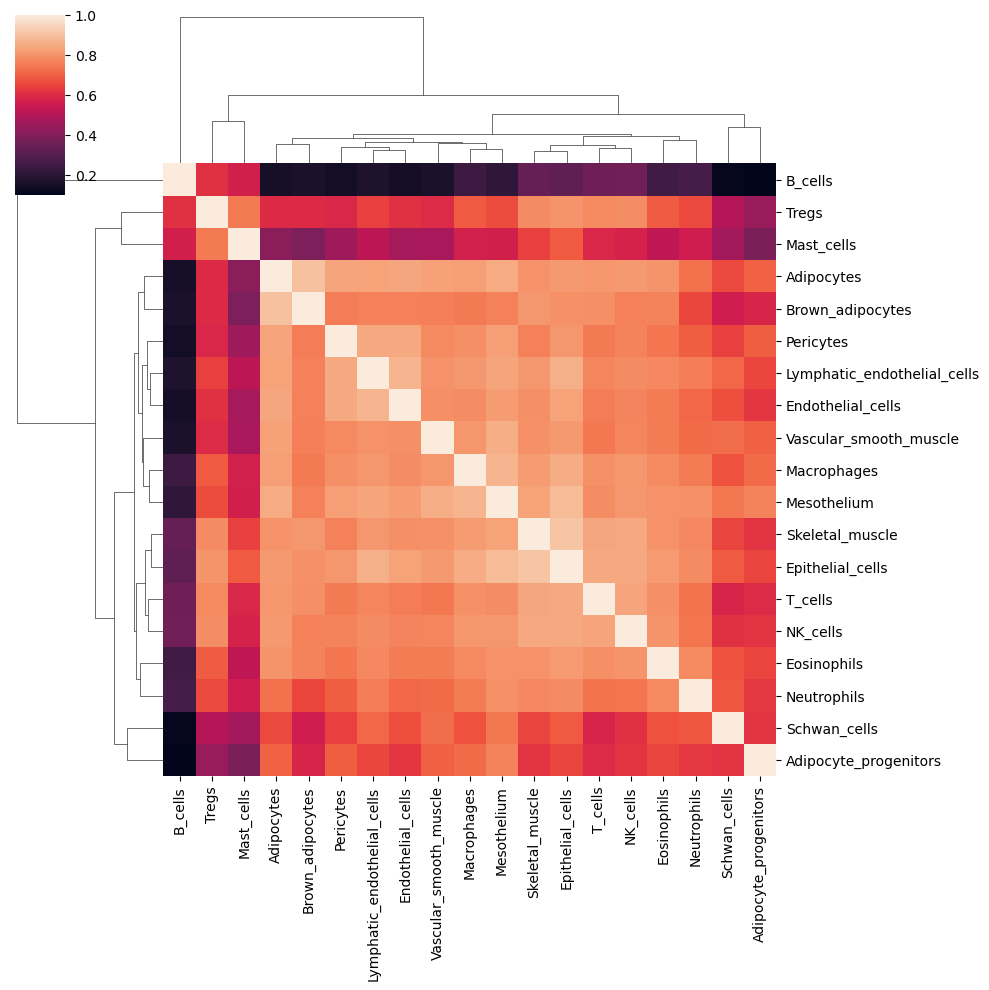

In [16]:
sns.clustermap(rsquared_dfs['B006_3'])

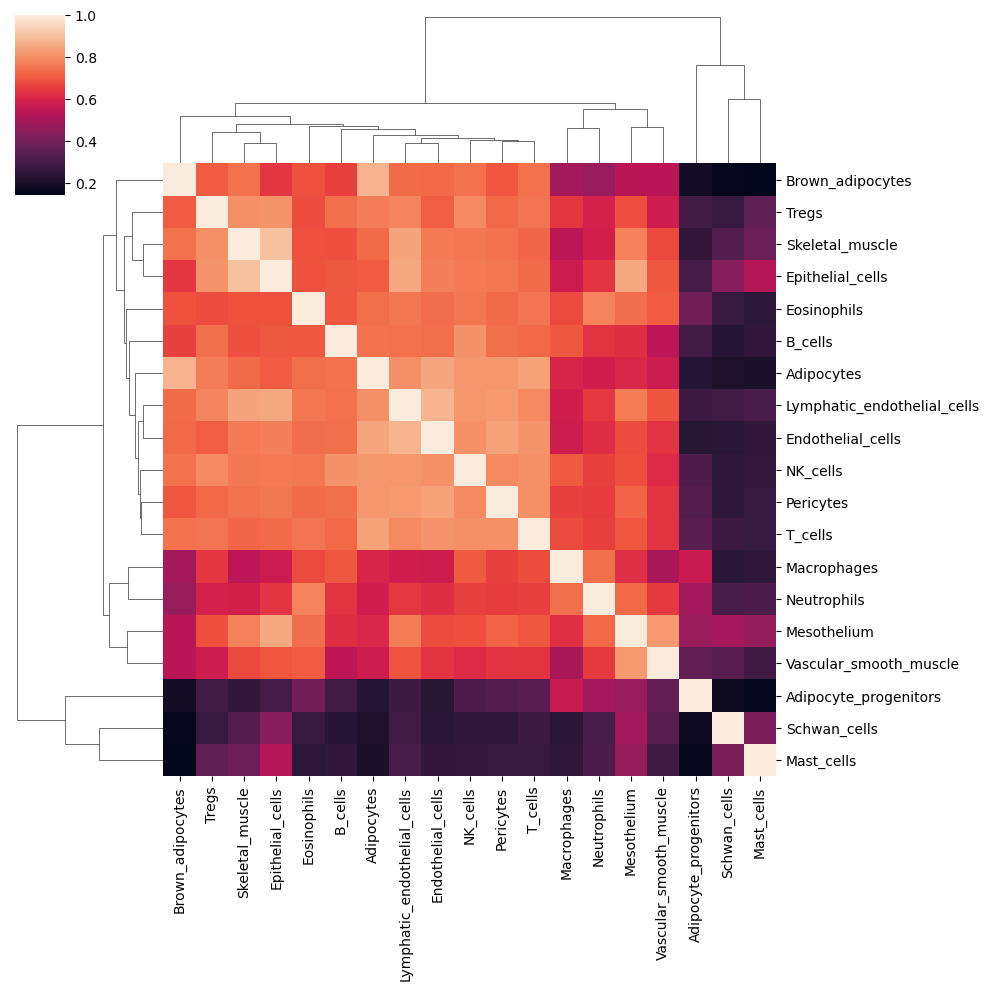

In [18]:
sns.clustermap(rsquared_dfs['A021_3'])

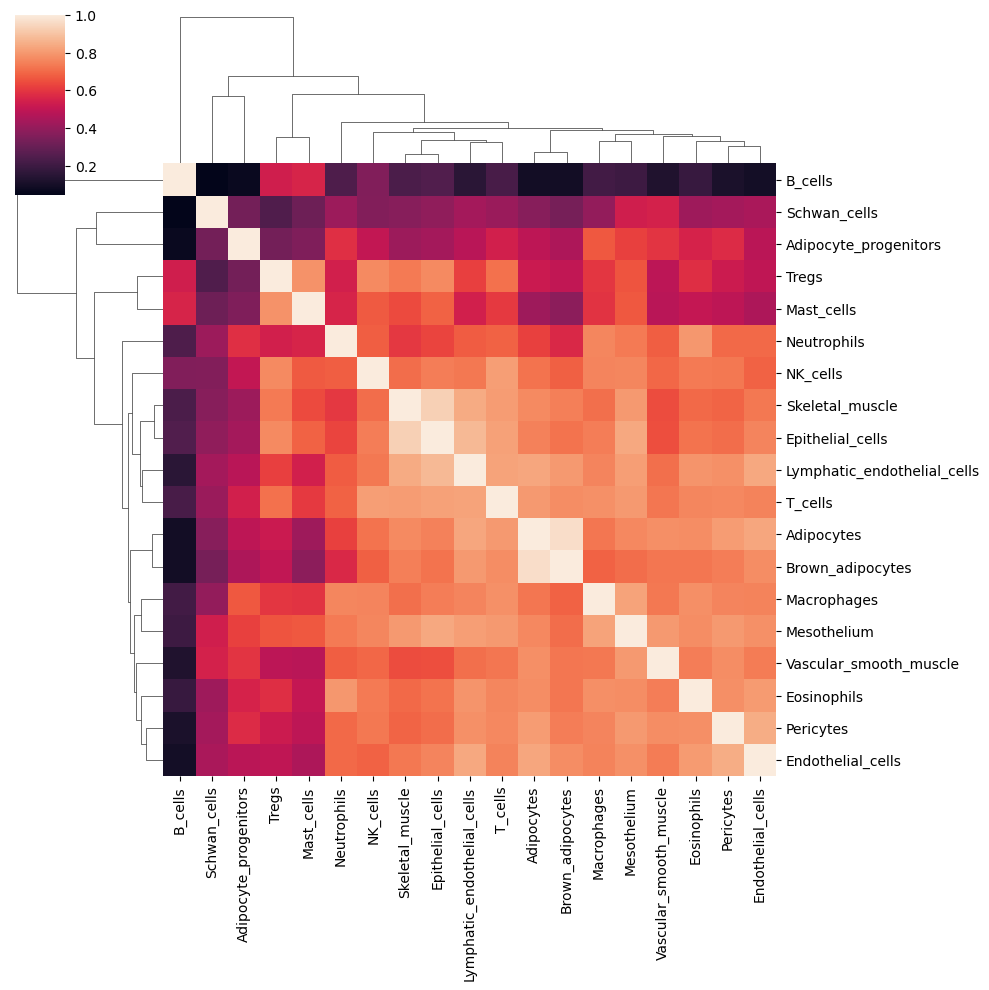

In [19]:
sns.clustermap(rsquared_dfs['A006_3'])

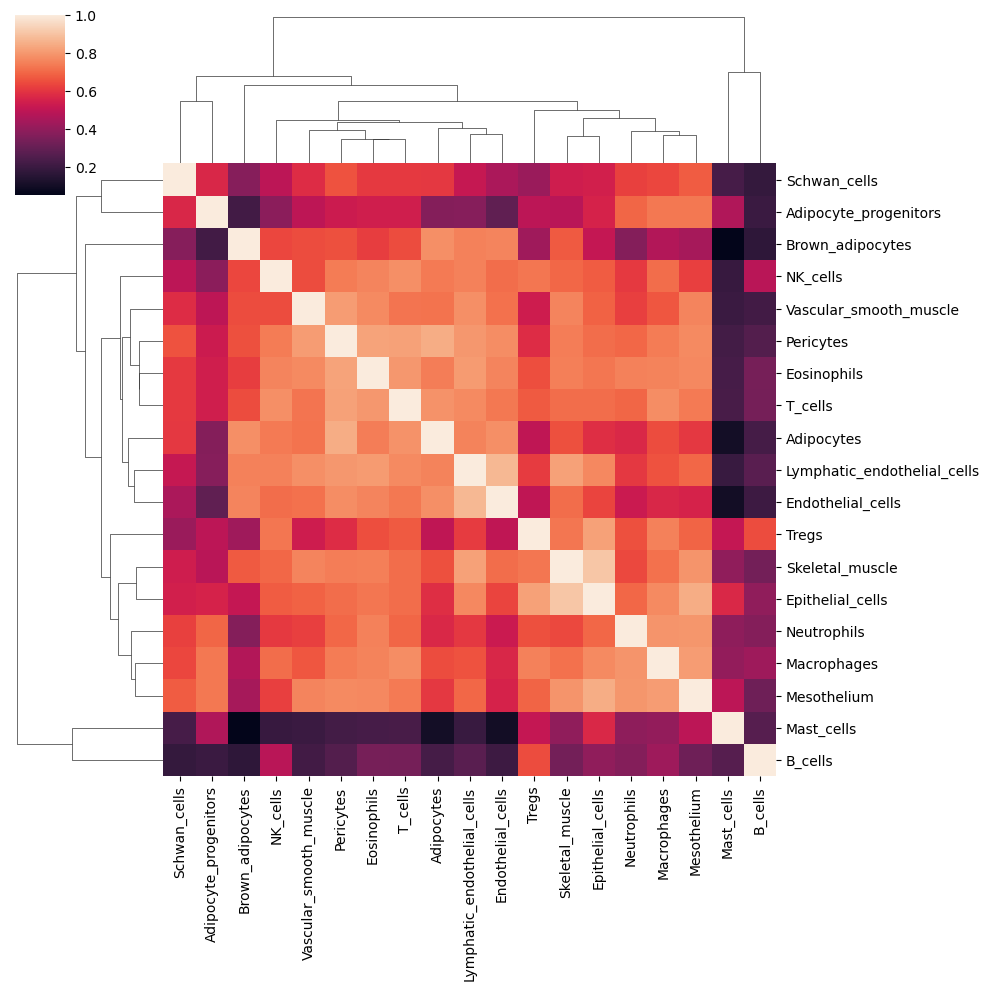

In [20]:
sns.clustermap(rsquared_dfs['A041_6'])

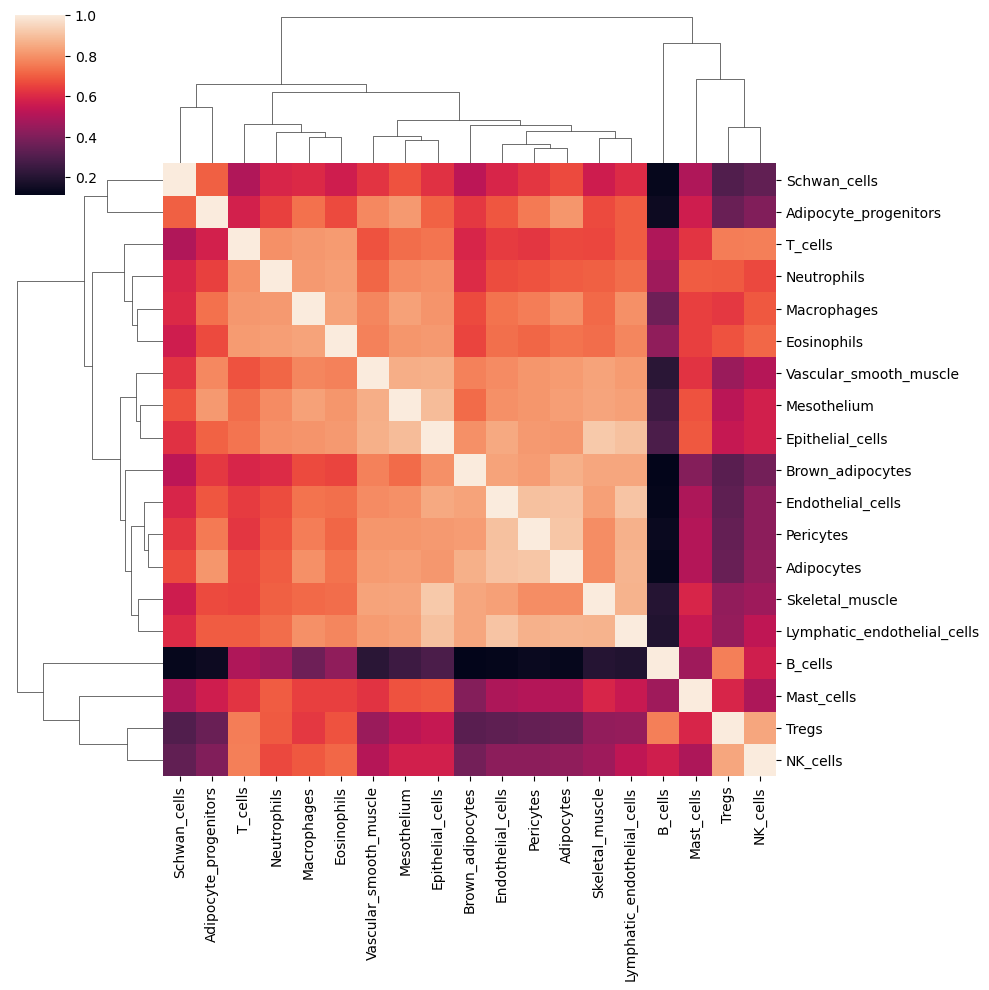

In [21]:
sns.clustermap(rsquared_dfs['B041_6'])

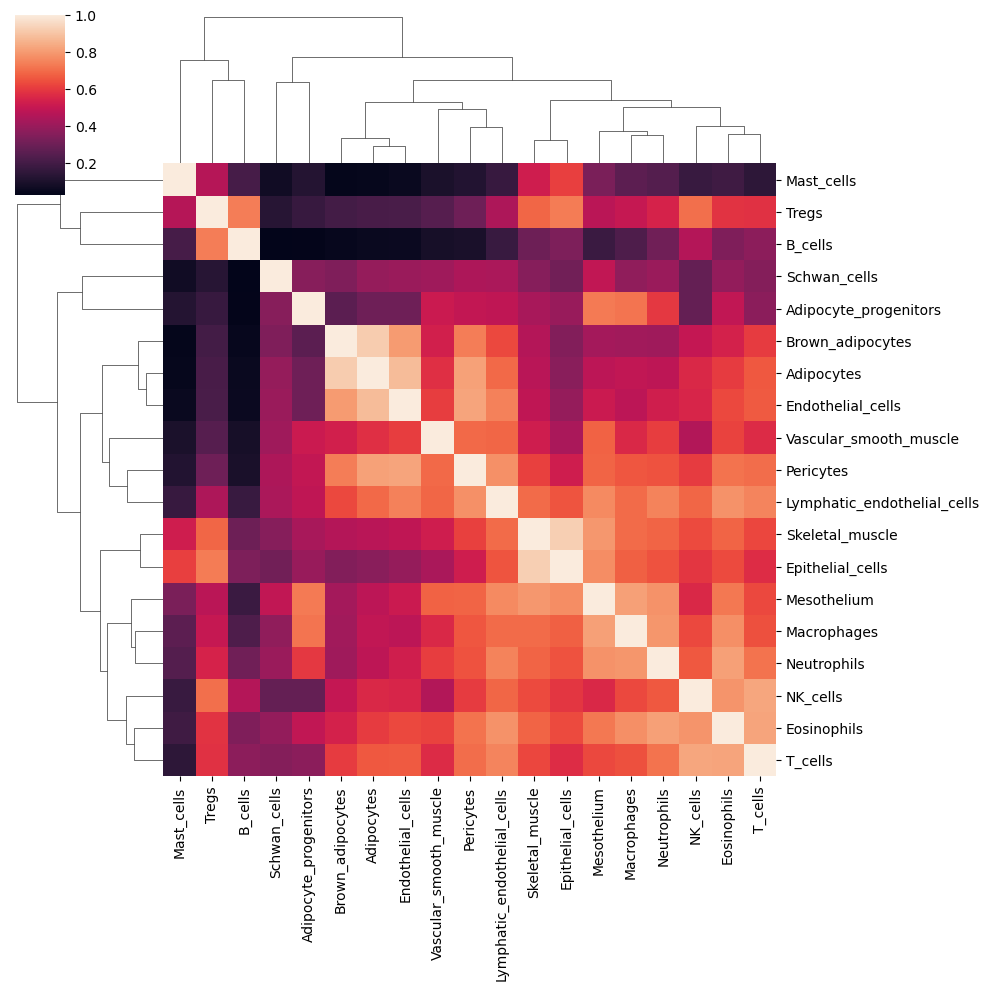

In [22]:
sns.clustermap(rsquared_dfs['B021_6'])

In [23]:
## combined slides analysis
combined_hex_avg_exp = pd.concat([hex_avg_exp['B006_3'][0], hex_avg_exp['A021_3'][0], hex_avg_exp['A006_3'][0], hex_avg_exp['A041_6'][0], hex_avg_exp['B041_6'][0], hex_avg_exp['B021_6'][0]]).reset_index(drop = True)
combined_weights = hex_avg_exp['B006_3'][1] + hex_avg_exp['A021_3'][1] + hex_avg_exp['A006_3'][1] + hex_avg_exp['A041_6'][1] + hex_avg_exp['B041_6'][1] + hex_avg_exp['B021_6'][1]

combined_rsquared_df = getrsquared(combined_hex_avg_exp, combined_weights)


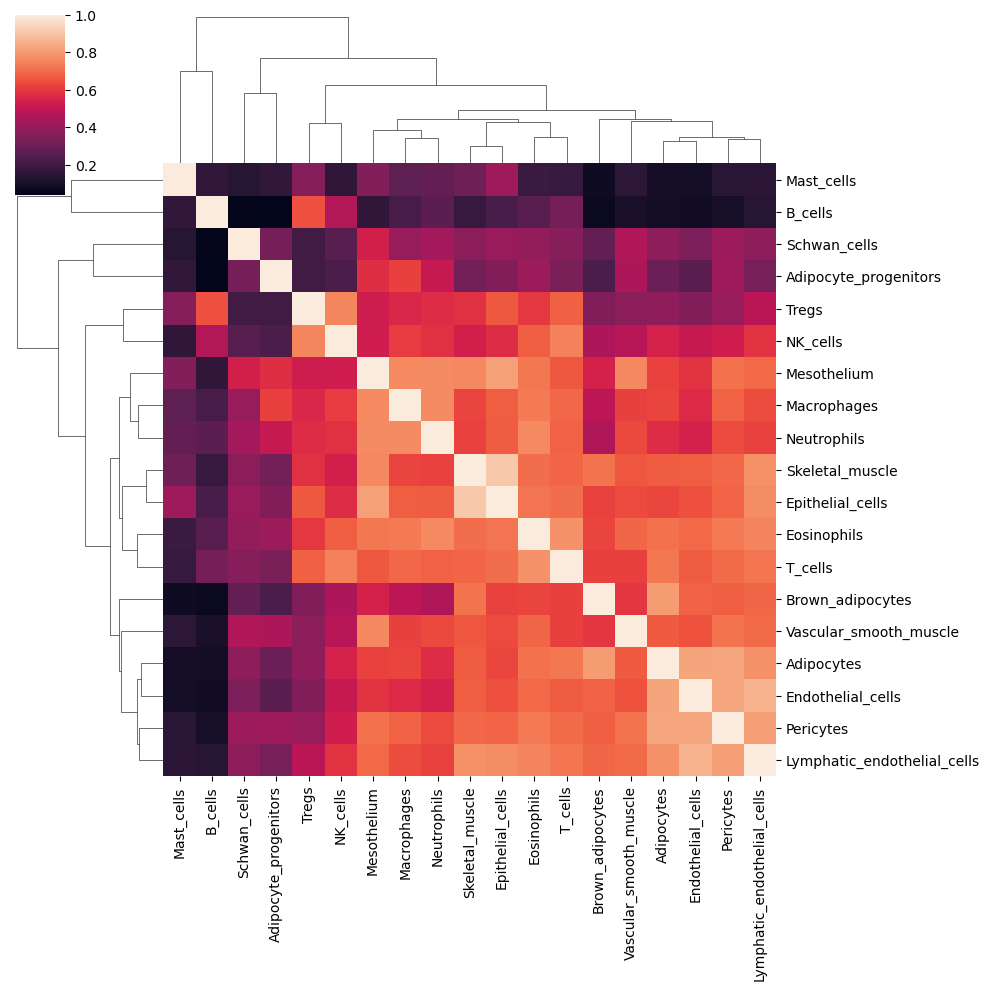

In [24]:
sns.clustermap(combined_rsquared_df)

### Showing the honeycomb units

In [25]:
## color the neighbors
adata_vis_neighbors_colored = adata_vis.copy()
adata_vis_neighbors_colored.obs['binary'] = 0
counter = 0
binary_idx = adata_vis_neighbors_colored.obs.columns.get_loc('binary')

for neighbor_idx, neighbor_data in enumerate(neighbors):
            indexes = []
            counter += 1
            for idx in range(0,7):
                tmp = np.where((adata_vis_neighbors_colored.obs['array_col'] == neighbor_data[idx][1]) & (adata_vis_neighbors_colored.obs['array_row'] == neighbor_data[idx][0]))[0]
                if len(tmp) > 0:
                    for item in tmp.tolist():
                        indexes.append(item)
                if counter %2 == 0:
                    adata_vis_neighbors_colored.obs.iloc[indexes, binary_idx] = 0.5
                if counter %2 == 1:
                    adata_vis_neighbors_colored.obs.iloc[indexes, binary_idx] = 1

In [26]:
## color the centers
adata_vis_centers_colored = adata_vis.copy()
adata_vis_centers_colored.obs['binary'] = 0
counter = 0
binary_idx = adata_vis_centers_colored.obs.columns.get_loc('binary')
center_idx = 0

for neighbor_idx, neighbor_data in enumerate(neighbors):
            indexes = []
            counter += 1
            indexes = np.where((adata_vis_centers_colored.obs['array_col'] == neighbor_data[center_idx][1]) & (adata_vis_centers_colored.obs['array_row'] == neighbor_data[center_idx][0]))[0].tolist()
            if counter %2 == 0:
                adata_vis_centers_colored.obs.iloc[indexes, binary_idx] = 0.5
            if counter %2 == 1:
                adata_vis_centers_colored.obs.iloc[indexes, binary_idx] = 1

In [27]:
import matplotlib.pyplot as plt
def select_slide(adata, s, batch_key="sample"):
    r"""This function selects the data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial experiments
    :param s: name of selected experiment
    :param batch_key: column in adata.obs listing experiment name for each location
    """

    slide = adata[adata.obs[batch_key].isin([s]), :].copy()
    s_keys = list(slide.uns["spatial"].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]

    slide.uns["spatial"] = {s_spatial: slide.uns["spatial"][s_spatial]}

    return slide

axes: [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


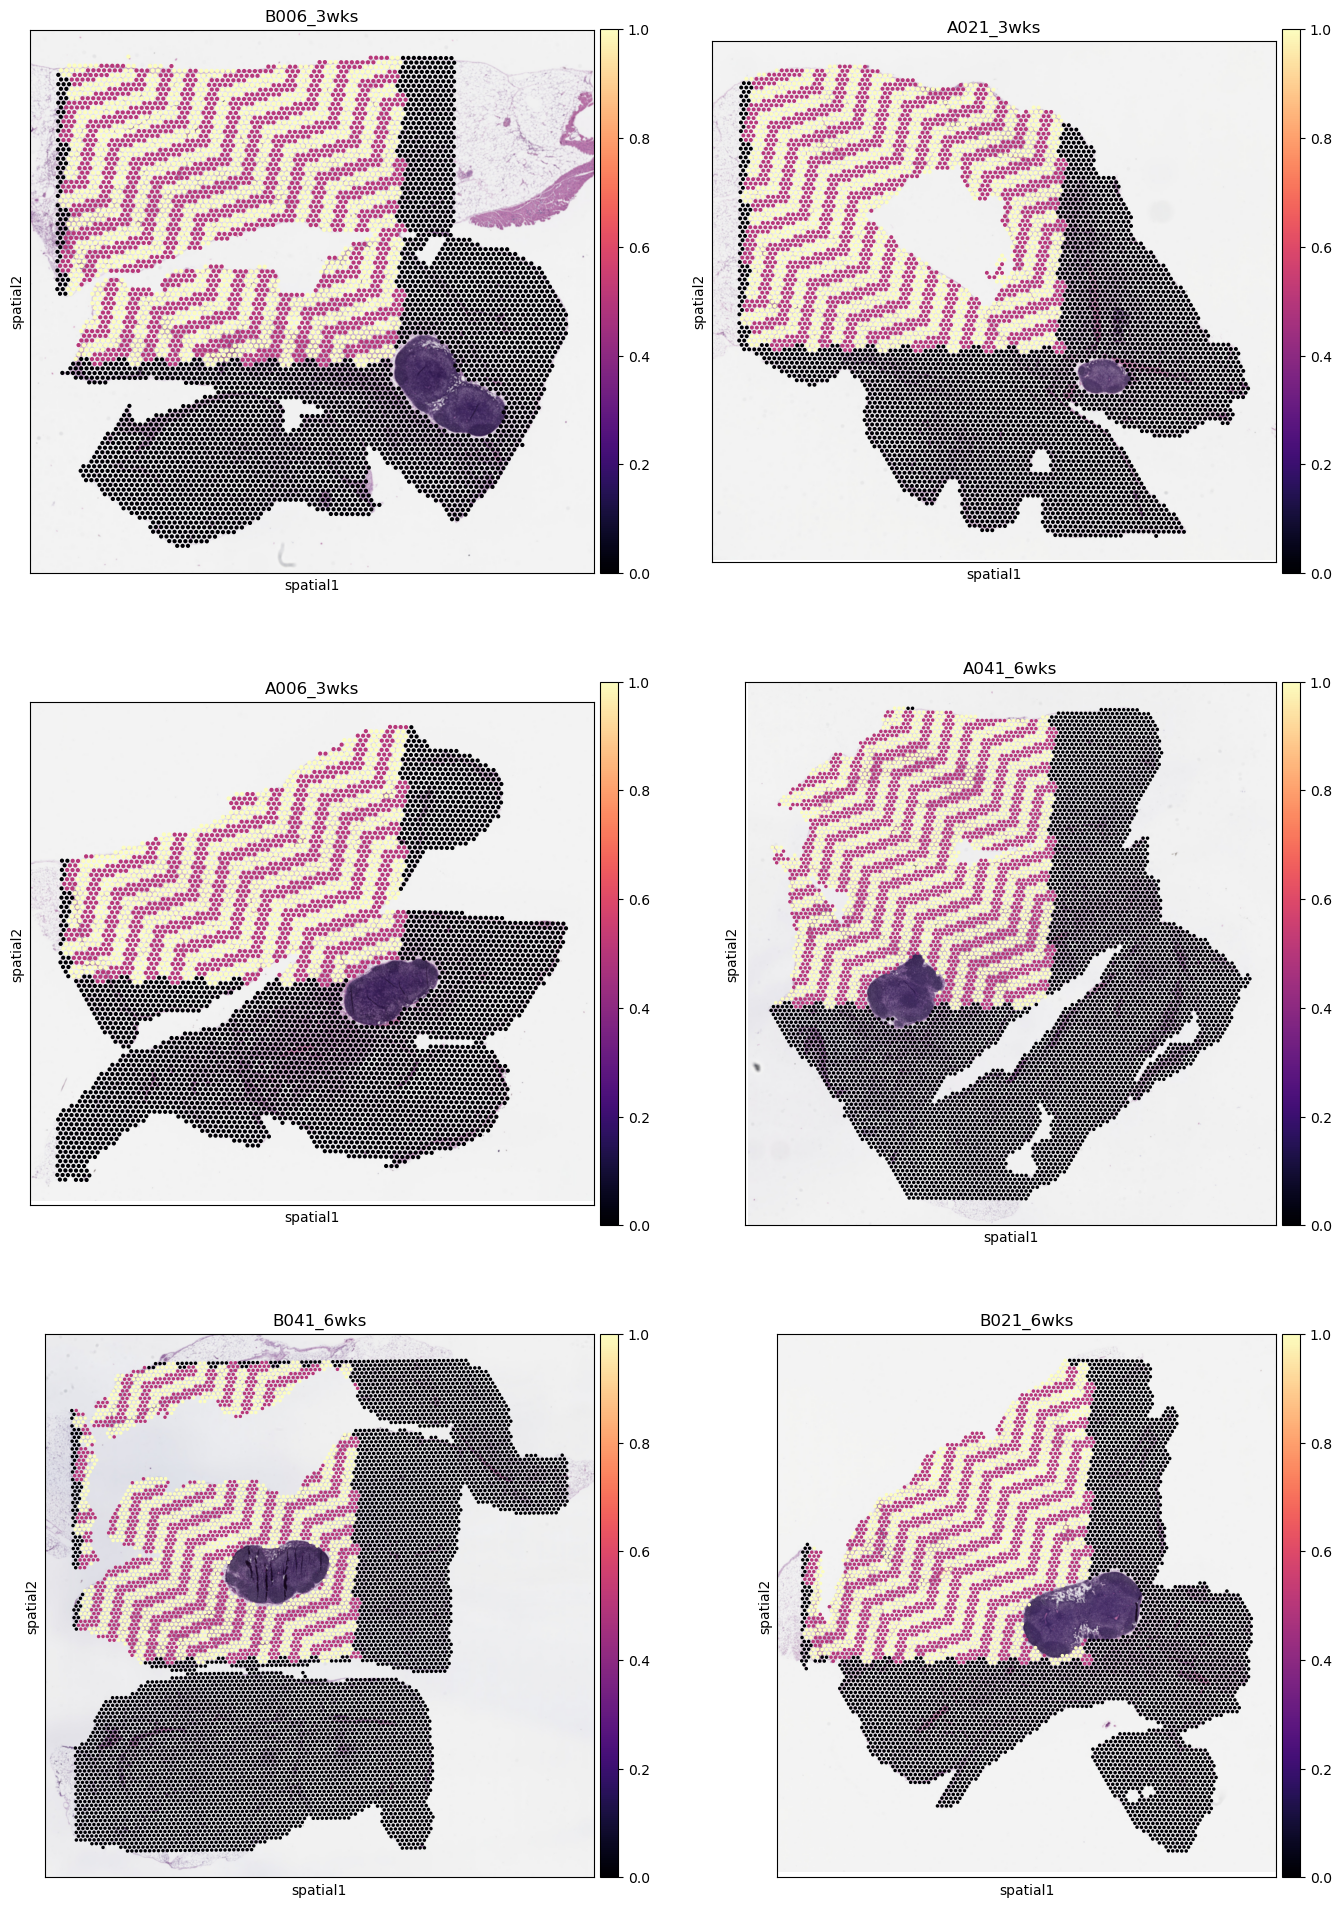

In [30]:
## Plot neighbors
# Define matplotlib Axes
# Number of Axes & plot size ['B006_3', 'A021_3', 'A006_3', 'A041_6', 'B041_6', 'B021_6']

slide_B006_3 = select_slide(adata_vis_neighbors_colored, 'B006_3')
slide_A021_3 = select_slide(adata_vis_neighbors_colored, 'A021_3')
slide_A006_3 = select_slide(adata_vis_neighbors_colored, 'A006_3')
slide_A041_6 = select_slide(adata_vis_neighbors_colored, 'A041_6')
slide_B041_6 = select_slide(adata_vis_neighbors_colored, 'B041_6')
slide_B021_6 = select_slide(adata_vis_neighbors_colored, 'B021_6')

ncols=2
nrows=3
figsize=8
wspace=0.1
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

# We can use these Axes objects individually to plot on them
# We need to set show=False so that the Figure is not displayed before we 
# finished plotting on all Axes and making all plot adjustments
sc.pl.spatial(slide_B006_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B006_3', show = False, ax=axs[0,0], title='B006_3wks')
sc.pl.spatial(slide_A021_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A021_3', show = False, ax=axs[0,1], title='A021_3wks')
sc.pl.spatial(slide_A006_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A006_3', show = False, ax=axs[1,0], title='A006_3wks')
sc.pl.spatial(slide_A041_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A041_6', show = False, ax=axs[1,1], title='A041_6wks')
sc.pl.spatial(slide_B041_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B041_6', show = False, ax=axs[2,0], title='B041_6wks')
sc.pl.spatial(slide_B021_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B021_6', ax=axs[2,1], title='B021_6wks')

axes: [[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


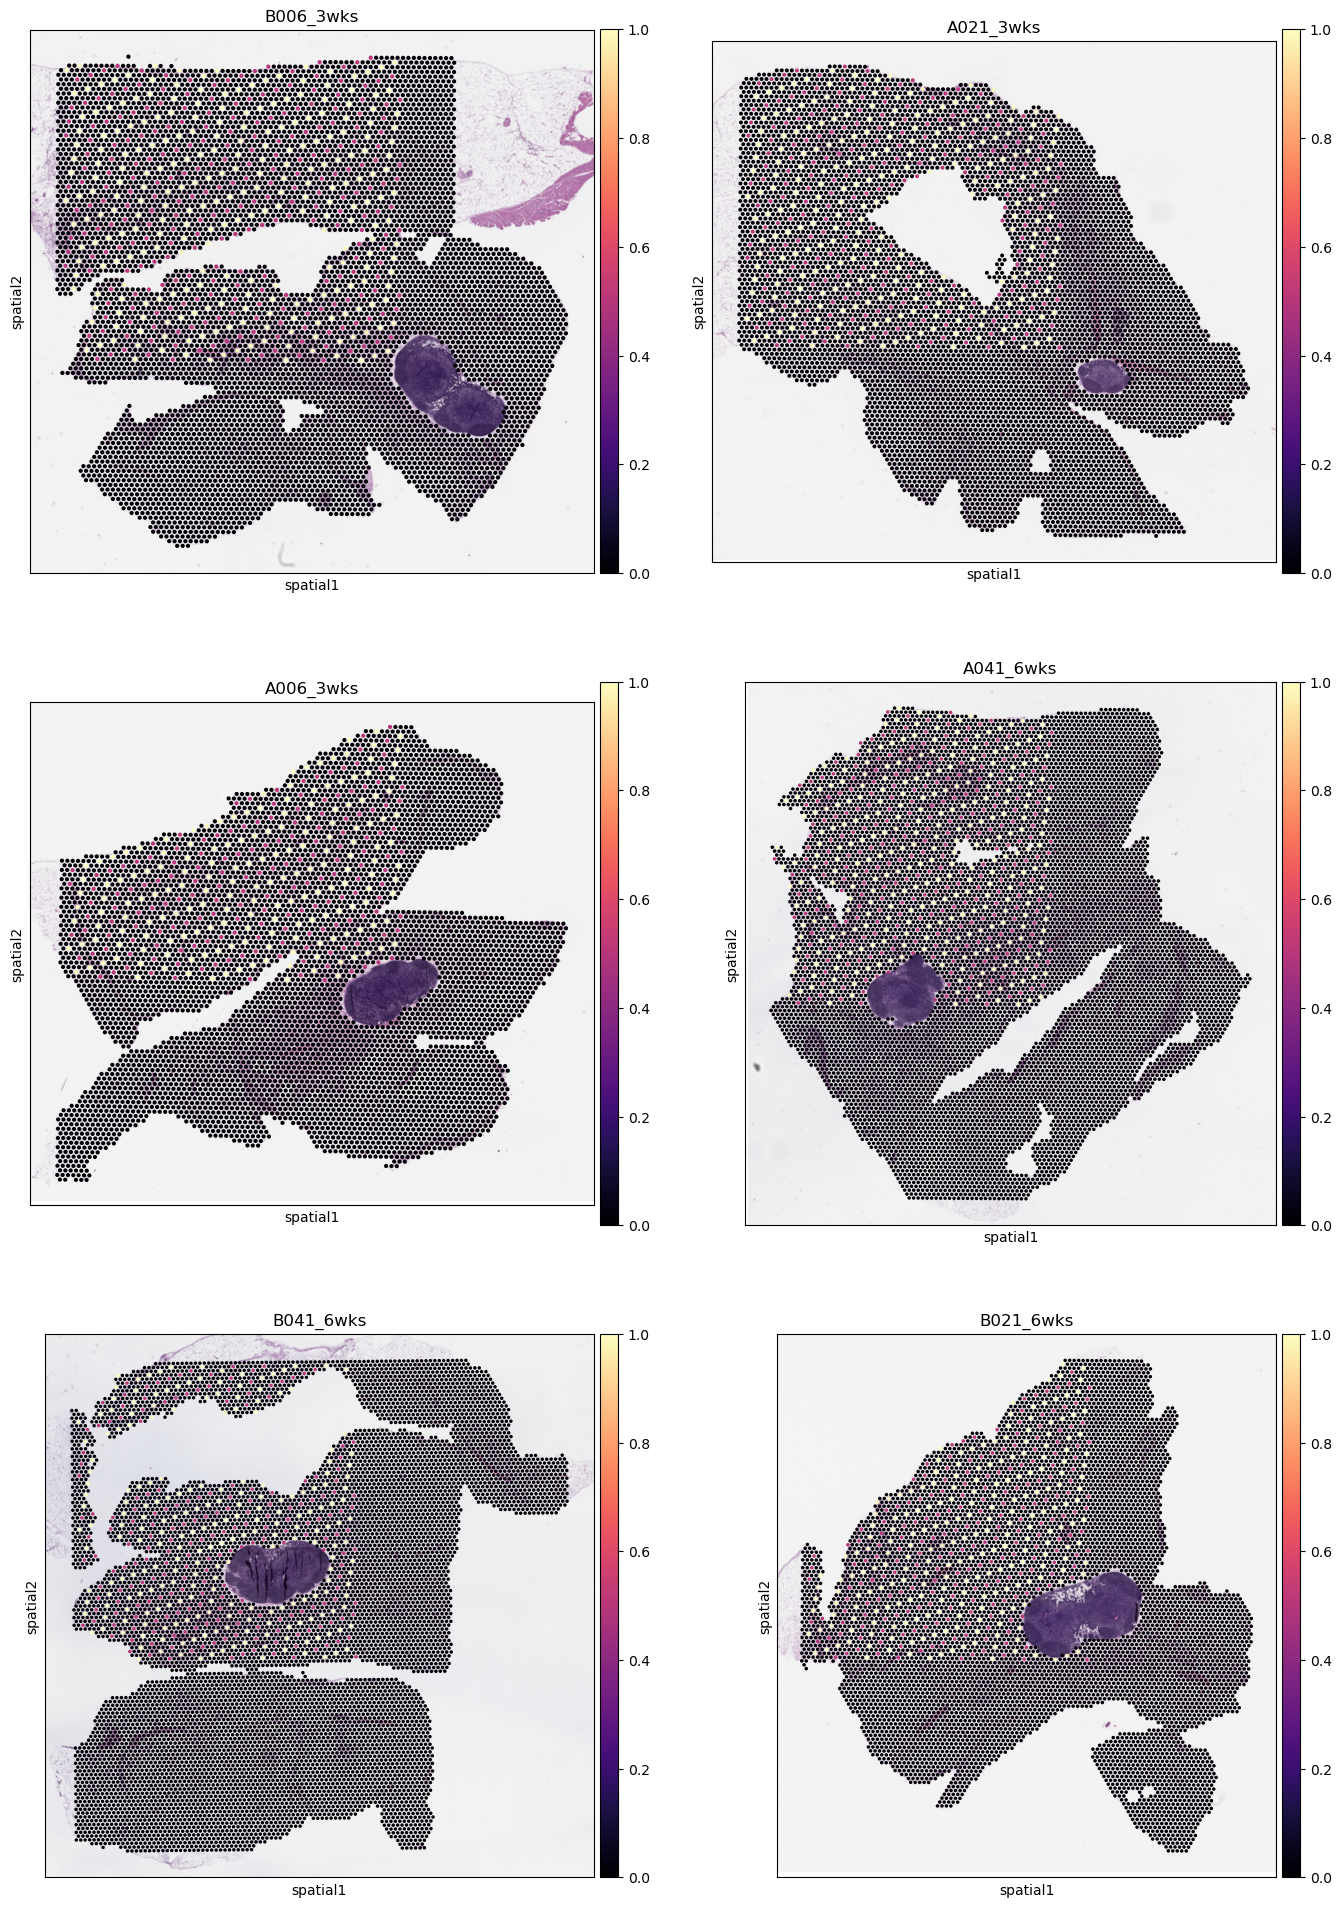

In [31]:
## Plot centers
# Define matplotlib Axes
# Number of Axes & plot size

slide_B006_3 = select_slide(adata_vis_centers_colored, 'B006_3')
slide_A021_3 = select_slide(adata_vis_centers_colored, 'A021_3')
slide_A006_3 = select_slide(adata_vis_centers_colored, 'A006_3')
slide_A041_6 = select_slide(adata_vis_centers_colored, 'A041_6')
slide_B041_6 = select_slide(adata_vis_centers_colored, 'B041_6')
slide_B021_6 = select_slide(adata_vis_centers_colored, 'B021_6')

ncols=2
nrows=3
figsize=8
wspace=0.1
fig,axs = plt.subplots(nrows=nrows, ncols=ncols,
                       figsize=(ncols*figsize+figsize*wspace*(ncols-1),nrows*figsize))
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print('axes:',axs)

# We can use these Axes objects individually to plot on them
# We need to set show=False so that the Figure is not displayed before we 
# finished plotting on all Axes and making all plot adjustments
sc.pl.spatial(slide_B006_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B006_3', show = False, ax=axs[0,0], title='B006_3wks')
sc.pl.spatial(slide_A021_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A021_3', show = False, ax=axs[0,1], title='A021_3wks')
sc.pl.spatial(slide_A006_3, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A006_3', show = False, ax=axs[1,0], title='A006_3wks')
sc.pl.spatial(slide_A041_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='A041_6', show = False, ax=axs[1,1], title='A041_6wks')
sc.pl.spatial(slide_B041_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B041_6', show = False, ax=axs[2,0], title='B041_6wks')
sc.pl.spatial(slide_B021_6, cmap='magma', color='binary', size=1.3, img_key='hires', vmin=0, vmax=1, library_id='B021_6', ax=axs[2,1], title='B021_6wks')


## Tetris grid ||>